In [1]:
#Dependencies 
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd


In [2]:
file = "EGOV_DATA_2016.csv"

df_egov_2016 = pd.read_csv(file)

In [21]:
len(df_egov_2016)

193

In [5]:
df_egov_2016 = df_egov_2016.sort_values(by="E-Government Rank")

df_egov_2016.head()

,Survey Year,Country Name,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
172,2016,United Kingdom of Great Britain and Northern I...,1,0.91928,1.00000,1.00000,0.94018,0.81766
78,2016,Australia,2,0.91428,0.98305,0.97826,1.00000,0.76459
74,2016,Republic of Korea,3,0.89149,0.96610,0.94203,0.87947,0.85296
191,2016,Singapore,4,0.88280,0.91525,0.97101,0.83598,0.84141
121,2016,Finland,5,0.88168,0.91525,0.94203,0.94399,0.75903


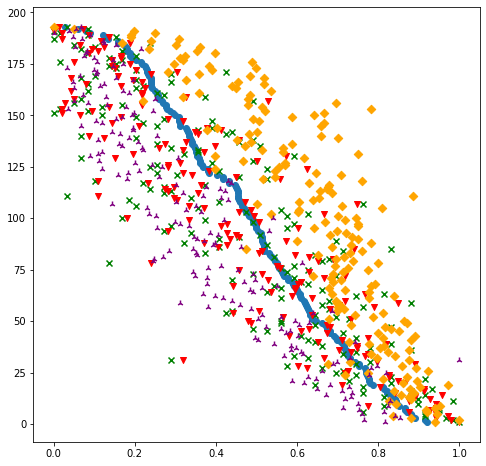

In [6]:
fig, ax = plt.subplots(figsize=(8,8));
y_axis = df_egov_2016['E-Government Rank']
x_axis1 = df_egov_2016['E-Government Index']
x_axis2 = df_egov_2016['E-Participation Index']
x_axis3 = df_egov_2016['Online Service Index']
x_axis4 = df_egov_2016['Human Capital Index']
x_axis5 = df_egov_2016['Telecommunication Infrastructure Index']
ax.scatter(x_axis1, y_axis, marker = 'o')
ax.scatter(x_axis2, y_axis, marker = 'x', color='green')
ax.scatter(x_axis3, y_axis, marker = 'v', color='red')
ax.scatter(x_axis4, y_axis, marker = 'D', color='orange')
ax.scatter(x_axis5, y_axis, marker = '2', color='purple')

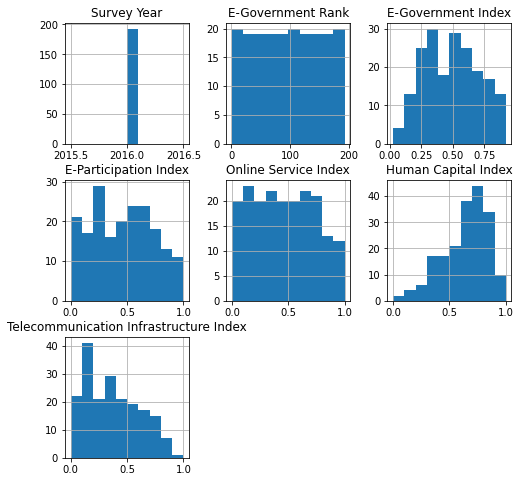

In [8]:
#fig, ax = plt.subplots(figsize=(8,8));
df_egov_2016.hist(figsize=(8,8));

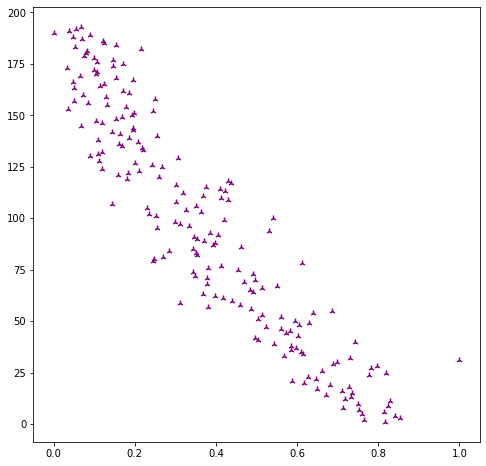

In [10]:
fig, ax = plt.subplots(figsize=(8,8));
ax.scatter(x_axis5, y_axis, marker = '2', color='purple')

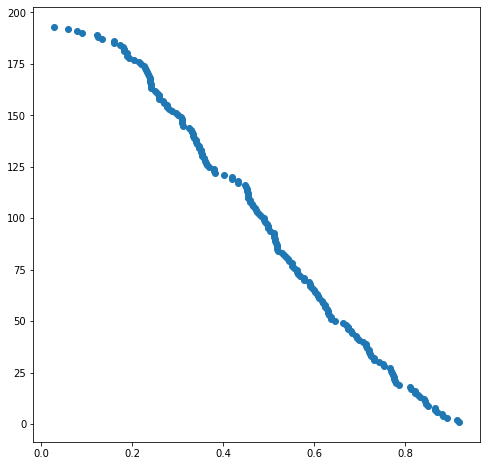

In [11]:
fig, ax = plt.subplots(figsize=(8,8));
ax.scatter(x_axis1, y_axis, marker = 'o');

In [18]:
# Determine if there are any potential outliers in E-Government Index
quartiles = df_egov_2016['E-Government Index'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,3)} could be outliers.")
print(f"Values above {round(upper_bound,3)} could be outliers.")

The lower quartile of occupancy is: 0.31219
The upper quartile of occupancy is: 0.6624899999999999
The interquartile range of occupancy is: 0.3502999999999999
The the median of occupancy is: 0.49686 
Values below -0.213 could be outliers.
Values above 1.188 could be outliers.


In [20]:
# Determine if there are any potential outliers in the average occupancy in California
quartiles = df_egov_2016['E-Participation Index'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {round(iqr,5)}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,3)} could be outliers.")
print(f"Values above {round(upper_bound,3)} could be outliers.")

The lower quartile of occupancy is: 0.23729
The upper quartile of occupancy is: 0.67797
The interquartile range of occupancy is: 0.44068
The the median of occupancy is: 0.47458 
Values below -0.424 could be outliers.
Values above 1.339 could be outliers.


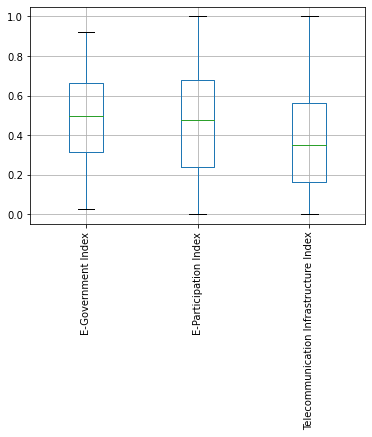

In [17]:
boxplot = df_egov_2016.boxplot(column=['E-Government Index', 'E-Participation Index', 'Telecommunication Infrastructure Index'], grid=True, rot=90)

<AxesSubplot:xlabel='Country Name'>

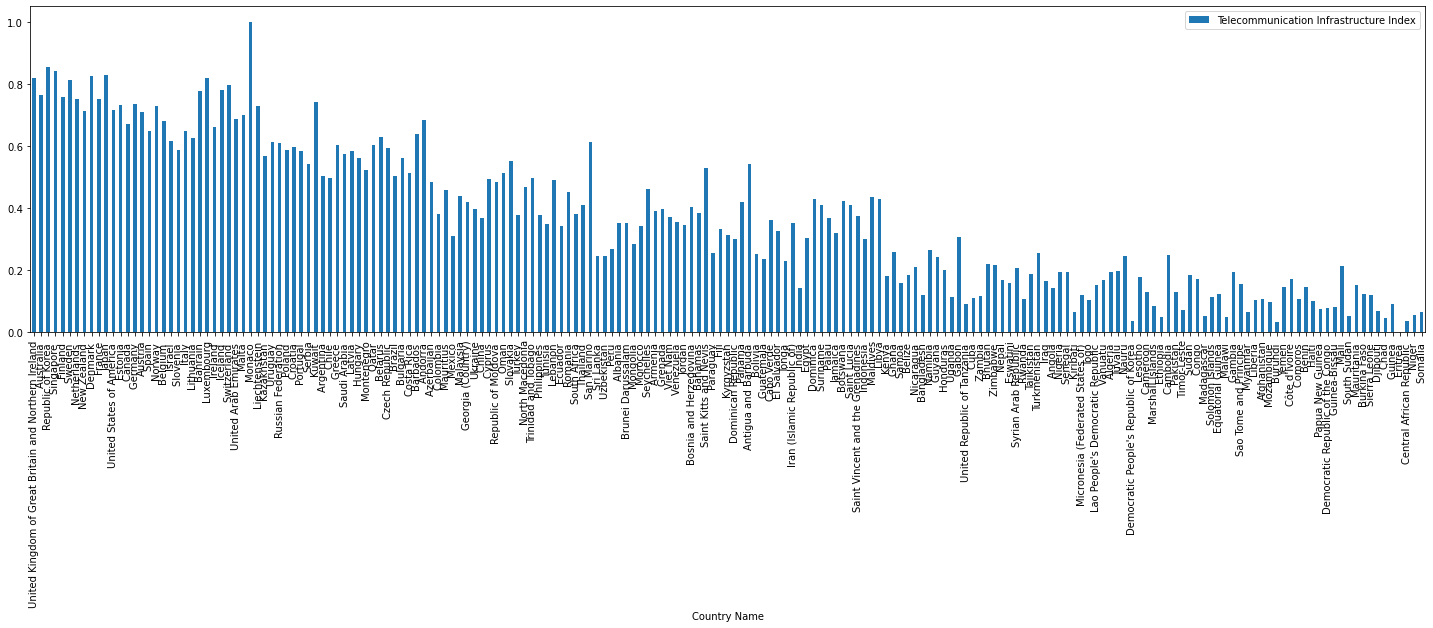

In [28]:
ax = df_egov_2016.plot.bar(x='Country Name', y='Telecommunication Infrastructure Index', rot=90, figsize=(25,6));
ax